In [3]:
import pandas as pd

df = pd.read_csv('/content/TEMP_ANNUAL_MEAN_1901-2021.csv')

In [4]:
print(df.head())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  19.32  20.89  24.95  28.22  29.76  29.85  28.24  27.33  27.23  26.33   
1  1902  20.17  21.58  25.73  28.15  30.00  29.47  27.99  27.71  26.76  25.33   
2  1903  19.28  20.71  23.92  27.67  29.47  29.53  28.32  27.16  27.00  25.69   
3  1904  19.19  20.32  24.41  28.11  29.17  28.80  27.36  27.26  26.84  25.67   
4  1905  18.34  18.37  23.15  26.26  29.73  29.87  28.13  27.65  27.16  26.35   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  22.92  20.05   25.42    20.11    27.64    28.16    23.10  
1  22.43  19.77   25.42    20.88    27.96    27.98    22.51  
2  22.01  19.30   25.01    19.99    27.02    28.00    22.33  
3  22.16  19.86   24.93    19.76    27.23    27.57    22.56  
4  23.24  19.79   24.84    18.36    26.38    28.20    23.13  


DATA CLEANING:

DESCRIPTIVE STATISTICS

In [5]:
print(df.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000   19.471240   21.329339   24.803554   27.925372   
std      35.073732    0.492527    0.721850    0.695428    0.607111   
min    1901.000000   17.770000   18.370000   23.150000   26.260000   
25%    1931.000000   19.200000   20.890000   24.350000   27.490000   
50%    1961.000000   19.460000   21.290000   24.760000   27.990000   
75%    1991.000000   19.810000   21.830000   25.280000   28.350000   
max    2021.000000   20.690000   23.150000   26.670000   29.480000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  121.000000  121.000000  121.000000  121.000000  121.000000  121.000000   
mean    29.706033   29.215702   27.849752   27.378843   27.109669   25.861570   
std      0.481908    0.493904    0.342935    0.305328    0.327312    0.446109   
min     27.730000   28.020000   26.930000   2

TIME SERIES ANALYSIS

In [6]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')


In [7]:
df['ANNUAL'] = pd.to_numeric(df['ANNUAL'], errors='coerce')


Trends: By examining the line connecting the markers, you can identify trends in annual temperatures over the years.

Increases or decreases: If the line generally trends upwards, it indicates a rise in temperatures; if it trends downwards, it shows a decline.

Fluctuations: Sharp spikes or drops in temperature from year to year can indicate unusual weather patterns or anomalies.

Overall Pattern: Observing the overall trend can provide insights into climate change or seasonal variations affecting the region over the years represented in your dataset.

In [8]:
import plotly.graph_objects as go
fig = go.Figure()

# Add a scatter plot for annual temperatures
fig.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['ANNUAL'],
    mode='lines+markers',
    marker=dict(size=10, color='slategray', line=dict(width=2, color='DarkSlateGrey')),
    line=dict(shape='spline', width=2, color='lightslategray'),
    name='Annual Temperature',
    hoverinfo='text',
    hovertext=df.apply(lambda row: f"Year: {row['YEAR']}<br>Temperature: {row['ANNUAL']} °C", axis=1)
))

# Update layout with decorative features
fig.update_layout(
    title='Annual Temperature Over Years',
    title_font=dict(size=24, color='darkred'),
    xaxis_title='Year',
    yaxis_title='Annual Temperature (°C)',
    xaxis=dict(title_font=dict(size=24)),
    yaxis=dict(title_font=dict(size=18)),
    showlegend=True,
    template='plotly_white',
    plot_bgcolor='lightsteelblue',
    hovermode='closest'
)

# Show the figure
fig.show()


Monthly Variations: By examining the heights of the bars, you can quickly identify which months have higher or lower average temperatures. For instance:
Summer Months: Typically, you might expect to see higher average temperatures in the summer months (e.g., JUN, JUL, AUG) compared to winter months (e.g., JAN, FEB, DEC).
Winter Months: The bars for winter months may show lower average temperatures, often dropping significantly below those of the summer months.
Temperature Range: The graph can help illustrate the temperature range throughout the year, showing how temperatures peak and dip at different times.

Identifying Anomalies:

If any bar significantly deviates from the expected pattern (e.g., an unusually high temperature in winter or a surprisingly low temperature in summer), it may warrant further investigation. Such anomalies could indicate unusual weather patterns or climate events.

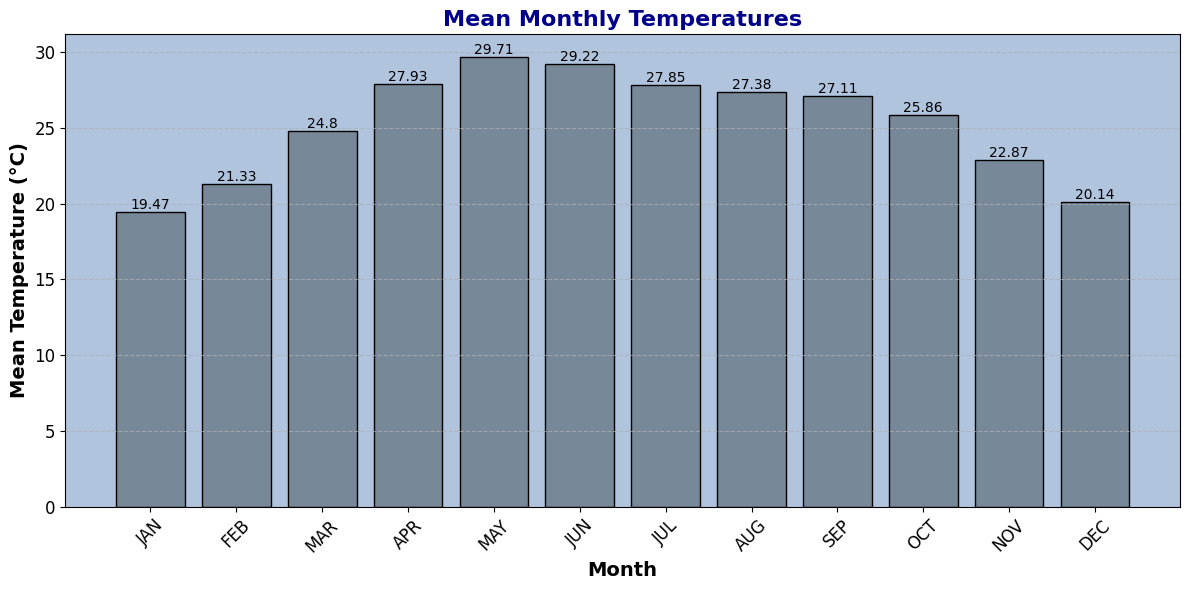

In [13]:
# Define the months to match your DataFrame's column names
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Calculate the monthly means
monthly_means = df[months].mean()

# Plot the monthly means
plt.figure(figsize=(12, 6))
bars = plt.bar(months, monthly_means, color='lightslategray', edgecolor='black')

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10, color='black')

# Title and labels
plt.title('Mean Monthly Temperatures', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Mean Temperature (°C)', fontsize=14, fontweight='bold')

# Customize x-ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a background color
plt.gca().set_facecolor('lightsteelblue')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


The graph visually demonstrates typical seasonal temperature trends over the years 2000–2010.

Winter (January, February, November, December): Lower temperatures (~20°C).

Spring (March to May): Gradual warming (~20°C to 28°C).

Summer (June to August): Peak temperatures (~30°C).

Fall (September to October): Cooling temperatures (from ~28°C to ~25°C).


The temperature trend follows a predictable seasonal cycle, with summer months being the warmest and winter months being the coolest.

<ipython-input-19-4a5081b6ab9d>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




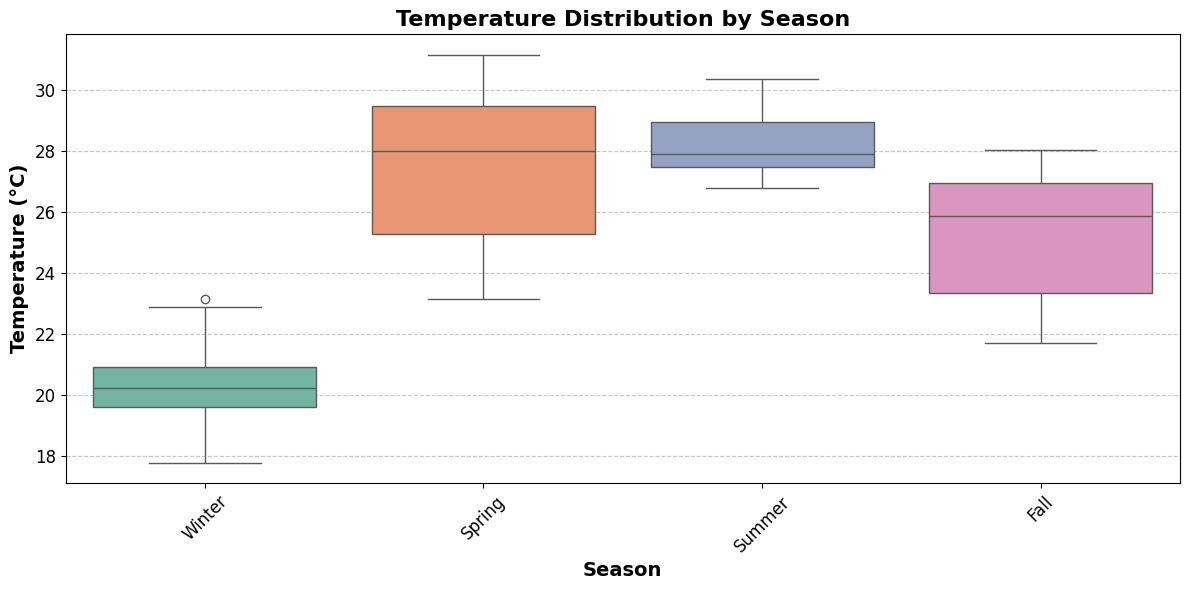

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing monthly temperatures
# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Define the months that correspond to the DataFrame columns
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Define the months and their corresponding seasons
season_mapping = {
    'JAN': 'Winter', 'FEB': 'Winter', 'MAR': 'Spring',
    'APR': 'Spring', 'MAY': 'Spring', 'JUN': 'Summer',
    'JUL': 'Summer', 'AUG': 'Summer', 'SEP': 'Fall',
    'OCT': 'Fall', 'NOV': 'Fall', 'DEC': 'Winter'
}

# Melt the DataFrame to long format
monthly_df = df.melt(id_vars='YEAR', value_vars=months, var_name='MONTH', value_name='TEMPERATURE')

# Map the months to seasons
monthly_df['SEASON'] = monthly_df['MONTH'].map(season_mapping)

# Convert the temperature to numeric, coercing errors
monthly_df['TEMPERATURE'] = pd.to_numeric(monthly_df['TEMPERATURE'], errors='coerce')

# Fill missing values (optional)
monthly_df['TEMPERATURE'].fillna(monthly_df['TEMPERATURE'].mean(), inplace=True)

# Box plot for seasonal temperatures
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_df, x='SEASON', y='TEMPERATURE', palette='Set2')
plt.title('Temperature Distribution by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Winter has the lowest temperatures overall, with a median of about 21°C. It also has an outlier, indicating an unusually warm day in the data.

Spring shows warmer temperatures, with a median around 28°C, and a slightly broader range of temperatures than Winter.

Summer has a slightly lower median temperature than Spring at 26°C, but the temperature range is narrow, indicating consistency.

Fall shares a similar temperature pattern to Summer, with a median of 26°C and a slightly wider range of temperatures.


Overall Conclusion:

Winter is the coldest season, and Spring is the warmest, with Summer and Fall having similar and moderate temperatures.

Temperature consistency is higher in Summer and Fall, while Spring has the greatest variability in temperatures.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact



# Define the months
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Create a slider for year range selection
year_range_slider = widgets.IntRangeSlider(
    value=[2000, 2010],
    min=2000,
    max=2010,
    step=1,
    description='Year Range:',
    continuous_update=False
)

# Function to update the plot based on selected year range
def update_plot(year_range):
    start_year, end_year = year_range
    # Filter the DataFrame for the specified year range
    df_filtered = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]

    # Calculate monthly averages
    monthly_avg = df_filtered[months].mean()

    # Plot the monthly temperature trends for the selected years
    plt.figure(figsize=(12, 6))
    monthly_avg.plot(marker='o', linestyle='-', markersize=6, color='b')
    plt.fill_between(months, monthly_avg, alpha=0.1, color='b')
    plt.title(f'Monthly Temperature Trends from {start_year} to {end_year}', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=14, fontweight='bold')
    plt.ylabel('Average Temperature (°C)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(y=monthly_avg.mean(), color='r', linestyle='--', label='Overall Average')
    plt.legend(title='Statistics', loc='upper left')
    plt.tight_layout()
    plt.show()

# Use interact to create the interactive plot with the year range slider
interact(update_plot, year_range=year_range_slider)

interactive(children=(IntRangeSlider(value=(2000, 2010), continuous_update=False, description='Year Range:', m…

<function __main__.update_plot(year_range)>

In the heatmap:

Dark red indicates strong positive correlation.
Dark blue shows strong negative correlation.
Lighter shades represent weaker correlations, with near-zero correlations in light blue or white.

Strong Positive Correlation (Values close to +1):

If two months show a correlation close to 1, their temperatures tend to increase and decrease together. For example, if October and September have a high correlation (e.g., 0.75), it means warmer october months usually predict warmer September months.

Strong Negative Correlation (Values close to -1):

A correlation near -1 suggests an inverse relationship. If any months show such a pattern, it would indicate that when temperatures increase in one month, they tend to decrease in the other, though this is uncommon in temperature datasets.

Moderate/Weak Positive or Negative Correlations (Values between +0.5 to -0.5):

If the correlation between two months is moderate (e.g., between 0.5 and 0.75), the relationship is weaker. A weaker correlation indicates that while there may be some seasonal temperature dependencies, they are not very strong.

Patterns Across Seasons:

Temperatures in adjacent months (like January-February or June-July) are more likely to be highly correlated because weather conditions tend to change gradually.
If temperatures between months far apart (e.g., January and July) are highly negatively correlated or not correlated at all, it indicates distinct seasonal differences.

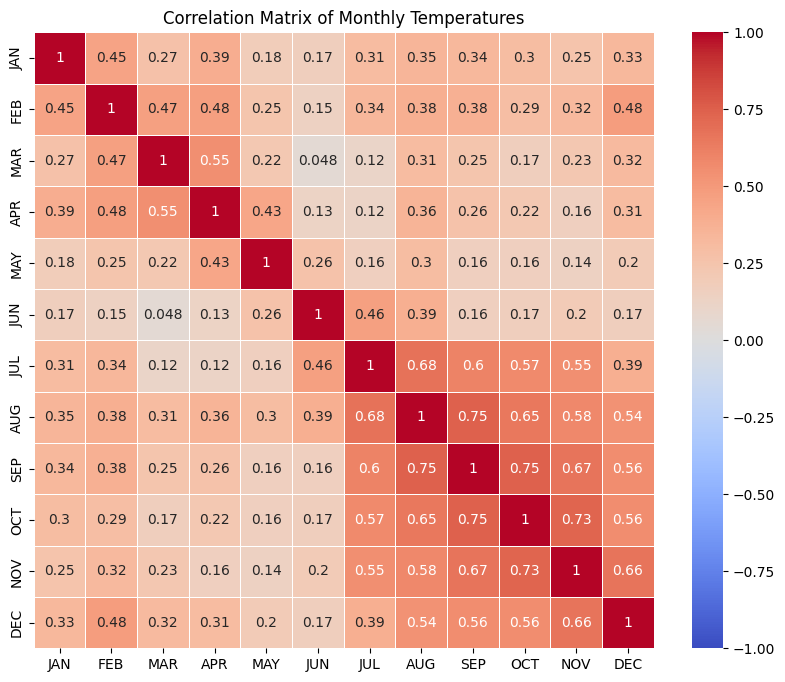

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the monthly temperatures
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
corr_matrix = df[months].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Monthly Temperatures')
plt.show()

Green Scatter Points: These represent the temperatures from March on the x-axis and from August on the y-axis. Each green dot is a pair of temperatures for a particular year (or time period). These points show the relationship between the temperatures of the two months.

Red Scatter Points: These highlight data points where the temperature in March exceeds 26°C. These are points where the March temperature is above a certain threshold, potentially indicating unusually warm months.

General Relationship:

If the green points form a clear trend (e.g., upward sloping), it suggests a relationship between the temperatures of March and August (warmer March correlating with warmer August).
If the points are scattered without a clear pattern, it suggests that March and August temperatures may not have a strong correlation.
Interpretation Based on Distribution:

If most points are clustered around certain values (e.g., between 20-25°C for both months), that could indicate consistent temperature ranges between March and August.
Outliers in the plot (especially highlighted in red) may indicate particularly hot or unusual weather patterns during those years.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox, HBox, VBox, Layout
from ipywidgets import Checkbox, VBox, interactive
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Create checkboxes
month_checkboxes = {month: Checkbox(value=False, description=month) for month in months}

# Function to plot the temperatures based on selected months
def plot_temperatures(selected_months):
    if len(selected_months) < 2:
        print("Please select two months for comparison.")
        return

    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(df[selected_months[0]], df[selected_months[1]], color='green', alpha=0.7, label='Temperatures')

    # Highlight points where the first month temperature is above a threshold (for example, 26°C)
    highlight = df[selected_months[0]] > 26
    plt.scatter(df.loc[highlight, selected_months[0]], df.loc[highlight, selected_months[1]], color='red', alpha=0.7, label='High Temp')

    # Add titles and labels
    plt.title(f'{selected_months[0]} vs {selected_months[1]} Temperatures', fontsize=16, fontweight='bold')
    plt.xlabel(f'{selected_months[0]} Temperature (°C)', fontsize=14, fontweight='bold')
    plt.ylabel(f'{selected_months[1]} Temperature (°C)', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Function to handle interactions with a limit on checkbox selection
def update_plot(**checkbox_values):
    selected_months = [month for month, checked in checkbox_values.items() if checked]

    if len(selected_months) > 2:
        print("You can only select up to two months.")
        return

    plot_temperatures(selected_months)

# Use interactive to call the plotting function based on checkbox selections
interactive_plot = interactive(update_plot, **month_checkboxes)
display(VBox([interactive_plot]))

Median (Middle Line of Box)
The line inside each box represents the median temperature for that season. The median is the middle value, meaning half the data points are above and half are below this value.
By comparing the medians across seasons, you can quickly see which seasons tend to have higher or lower average temperatures. For example:
Winter is expected to have a lower median temperature than Summer, reflecting typical seasonal variations.
2. Interquartile Range (IQR, Box Edges)
The edges of the box represent the 25th percentile (lower quartile) and the 75th percentile (upper quartile) of the temperature data.
The box height represents the IQR, which shows the spread of the middle 50% of the data points.
A larger box indicates more variability in temperatures during that season, while a smaller box suggests more consistency.
3. Whiskers (Lines Outside the Box)
The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR.
These whiskers capture the range of most of the data, excluding outliers.
4. Outliers (Individual Points Outside the Whiskers)
Any individual points outside the whiskers are considered outliers, which represent unusually high or low temperatures for that season. For example, an unusually warm winter or a cooler summer.
5. Comparison Across Seasons
Winter: Likely shows the lowest median and range of temperatures, with most values centered around cooler degrees.
Spring: The temperatures increase, but the box might show more variability compared to winter.
Summer: Expected to have the highest median and possibly the widest range, indicating that summer temperatures can vary significantly.
Fall: Temperatures may start cooling down again, showing a median between spring and winter values.


In [18]:
import plotly.express as px
df['Winter'] = df[['DEC', 'JAN', 'FEB']].mean(axis=1)
df['Spring'] = df[['MAR', 'APR', 'MAY']].mean(axis=1)
df['Summer'] = df[['JUN', 'JUL', 'AUG']].mean(axis=1)
df['Fall'] = df[['SEP', 'OCT', 'NOV']].mean(axis=1)

# Create a long format DataFrame for Plotly
seasonal_data = df.melt(id_vars=['YEAR'], value_vars=['Winter', 'Spring', 'Summer', 'Fall'],
                         var_name='Season', value_name='Temperature')

# Create the boxplot
fig = px.box(seasonal_data, x='Season', y='Temperature',
              hover_data=['Season', 'Temperature'],
              title='Seasonal Temperature Distribution',
              labels={'Temperature': 'Temperature (°C)', 'Season': 'Seasons'})

# Add mean and median as separate traces for hover information
mean_values = seasonal_data.groupby('Season')['Temperature'].mean().reset_index()
median_values = seasonal_data.groupby('Season')['Temperature'].median().reset_index()


# Update layout to show mean and median on hover
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers+text'))
fig.update_layout(hoverlabel=dict(bgcolor="white", font_size=16, font_family="Rockwell"))

# Show the plot
fig.show()

DENSITY PLOT:
This code snippet creates a density plot to visualize the distribution of annual temperatures from the 'ANNUAL' column in the dataframe df. A density plot is useful for understanding the data's probability distribution. The plot's size is customized using the figsize parameter, and labels for the x-axis and title are added to make the plot more informative. The show() function is used to display the plot.

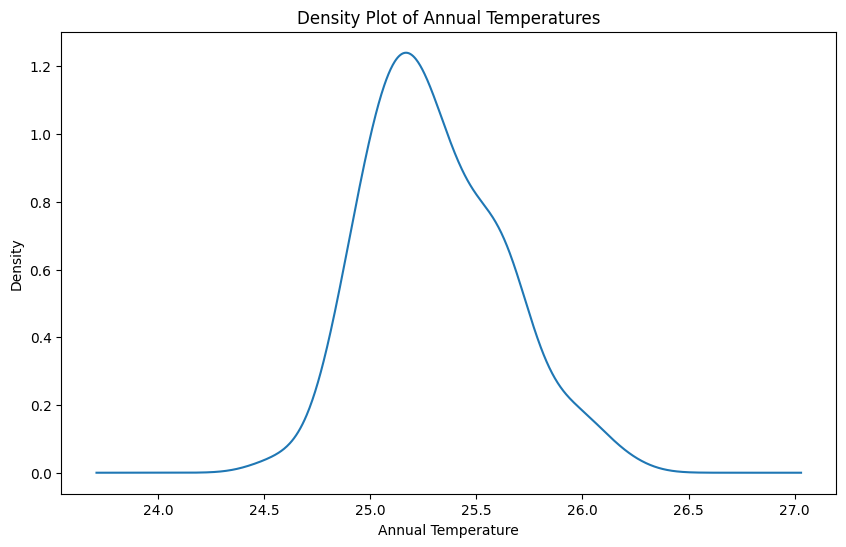

In [ ]:
df['ANNUAL'].plot(kind='density', figsize=(10, 6))
plt.title('Density Plot of Annual Temperatures')
plt.xlabel('Annual Temperature')
plt.show()


This code generates an interactive plot using Plotly to visualize both the annual temperatures and a 5-year rolling mean of the temperatures. The rolling() function is used to calculate the rolling mean for the 'ANNUAL' column over a window of 5 years. The plot consists of two traces: one representing the actual annual temperatures and another showing the rolling mean, making it easier to observe long-term trends. The layout is customized for interactivity, with hover information displayed for both x and y values, and the hovermode='x unified' ensures that hover labels from both traces appear simultaneously. A clean plotly_white theme and margins are also applied for better aesthetics.

In [ ]:
import plotly.graph_objects as go
df['Annual_Rolling_Mean'] = df['ANNUAL'].rolling(window=5).mean()

# Create the plot
fig = go.Figure()

# Add the annual temperature trace
fig.add_trace(go.Scatter(x=df['YEAR'], y=df['ANNUAL'],
                         mode='lines+markers',
                         name='Annual Temperature',
                         hoverinfo='x+y',
                         marker=dict(color='blue', size=8)))

# Add the rolling mean trace
fig.add_trace(go.Scatter(x=df['YEAR'], y=df['Annual_Rolling_Mean'],
                         mode='lines+markers',
                         name='5-Year Rolling Mean',
                         hoverinfo='x+y',
                         line=dict(color='red', width=2),
                         marker=dict(size=8)))

# Update layout for better interactivity
fig.update_layout(
    title='Annual Temperature with Rolling Mean',
    xaxis_title='Year',
    yaxis_title='Temperature (°C)',
    hovermode='x unified',
    template='plotly_white',
    margin=dict(l=40, r=40, t=40, b=40),
    showlegend=True
)

# Show the plot
fig.show()

This code creates an interactive bar chart using Matplotlib and Ipywidgets to visualize the year-over-year (YoY) changes in annual temperatures from the 'ANNUAL' column in the dataframe df. First, the diff() function calculates the YoY changes and stores them in a new column 'YoY_Change'. A slider widget is used to allow the user to select a specific year range. Based on the selected range, the data is filtered and a bar plot is generated showing the YoY changes in temperature. The plot includes custom labels, gridlines, and a reference line at zero to help distinguish increases and decreases in temperature. The interactive() function from Ipywidgets ensures that the plot updates dynamically as the slider is adjusted, making it an intuitive and engaging visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

df['YoY_Change'] = df['ANNUAL'].diff()

# Create a slider for year range selection
year_slider = widgets.IntRangeSlider(
    value=[2000, 2010],
    min=df['YEAR'].min(),
    max=df['YEAR'].max(),
    step=1,
    description='Select Year Range:',
    continuous_update=False,
    style={'description_width': 'initial'},
)

# Function to plot YoY changes for selected year range
def plot_yoy_changes(year_range):
    start_year, end_year = year_range

    # Filter DataFrame for the selected range
    filtered_df = df[(df['YEAR'] >= start_year) & (df['YEAR'] <= end_year)]

    plt.figure(figsize=(12, 6))

    # Plot YoY Change
    plt.bar(filtered_df['YEAR'], filtered_df['YoY_Change'], color='skyblue')

    # Adding titles and labels
    plt.title('Year-over-Year Change in Annual Temperature', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Change in Temperature', fontsize=14)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Create the interactive plot with the year range slider
interactive_plot = interactive(plot_yoy_changes, year_range=year_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'  # Set a height for the output area

# Display the interactive slider
display(interactive_plot)

interactive(children=(IntRangeSlider(value=(2000, 2010), continuous_update=False, description='Select Year Ran…